##After extracting features, combinbing both the datasets into one. 

In [54]:
import pandas as pd
import numpy as np


In [55]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
legitimate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/legitimate_copy.csv')

In [57]:
phishing  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/phishing_copy.csv')

In [58]:
#Concatenating the dataframes into one 
final_data = pd.concat([legitimate, phishing]).reset_index(drop=True)
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']
urldata = pd.DataFrame(final_data, columns= feature_names)
urldata.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [59]:
# Storing the data in CSV file
urldata.to_csv('final_data.csv', index=False)


In [60]:
!cp final_data.csv "/content/drive/MyDrive/Colab Notebooks/Datasets"

In [61]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/final_data.csv') #complete_temp
data.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [62]:
data.shape

(10, 18)

now our dataet extraction is complete. Our dataset has 5000 legitimate urls and 5000 phishing urls. 

In [63]:
import matplotlib.pyplot as plt


In [64]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10 non-null     object
 1   Have_IP        10 non-null     int64 
 2   Have_At        10 non-null     int64 
 3   URL_Length     10 non-null     int64 
 4   URL_Depth      10 non-null     int64 
 5   Redirection    10 non-null     int64 
 6   https_Domain   10 non-null     int64 
 7   TinyURL        10 non-null     int64 
 8   Prefix/Suffix  10 non-null     int64 
 9   DNS_Record     10 non-null     int64 
 10  Web_Traffic    10 non-null     int64 
 11  Domain_Age     10 non-null     int64 
 12  Domain_End     10 non-null     int64 
 13  iFrame         10 non-null     int64 
 14  Mouse_Over     10 non-null     int64 
 15  Right_Click    10 non-null     int64 
 16  Web_Forwards   10 non-null     int64 
 17  Label          10 non-null     int64 
dtypes: int64(17), object(1)
memory us

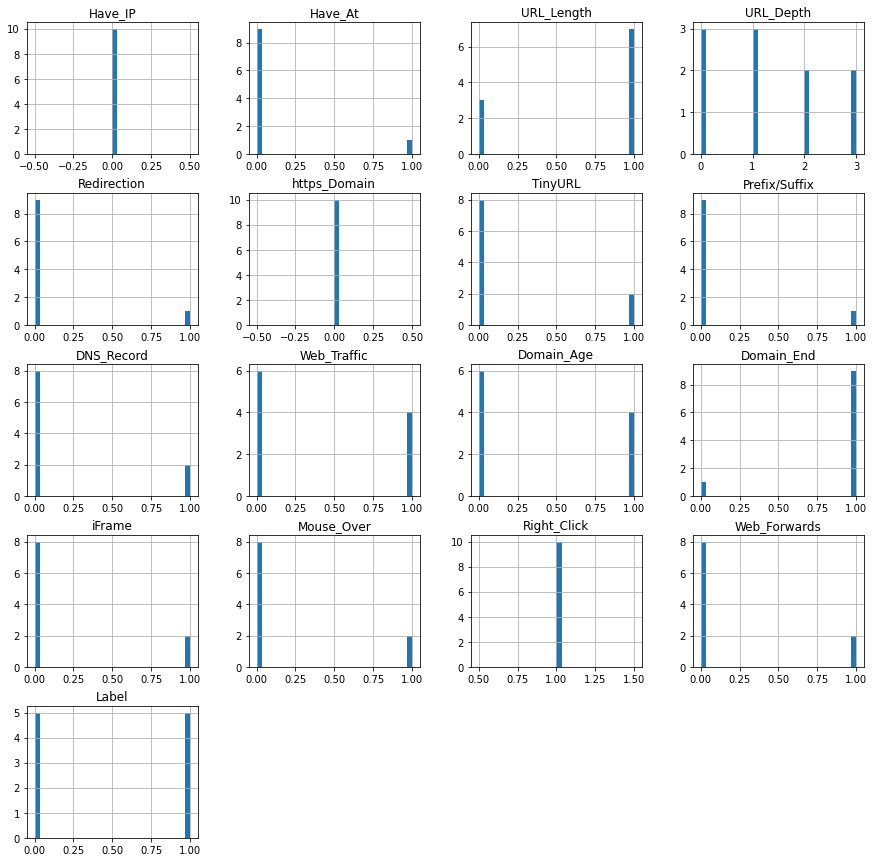

In [66]:
#Plotting the data distribution
data.hist(bins = 30,figsize = (15,15))
plt.show()


In [67]:
data['Domain']

0                                     graphicriver.net
1                                            ecnavi.jp
2                                         hubpages.com
3                                      extratorrent.cc
4                                        icicibank.com
5    hzibupigbnrtqezn-dot-sunlit-center-322513-556d...
6                              netttxnet.byethost3.com
7                                  phx.chromeproxy.net
8                           midnightluna1.typeform.com
9                        caracasmateriais.blogspot.com
Name: Domain, dtype: object

Domain name doesn't have any significance in our classfication. Our labels depend on the category of the data and not on what actually is the data  

Hence, dropping Domain column

In [68]:
data = data.drop( ['Domain'] , axis = 1).copy()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10 non-null     int64
 1   Have_At        10 non-null     int64
 2   URL_Length     10 non-null     int64
 3   URL_Depth      10 non-null     int64
 4   Redirection    10 non-null     int64
 5   https_Domain   10 non-null     int64
 6   TinyURL        10 non-null     int64
 7   Prefix/Suffix  10 non-null     int64
 8   DNS_Record     10 non-null     int64
 9   Web_Traffic    10 non-null     int64
 10  Domain_Age     10 non-null     int64
 11  Domain_End     10 non-null     int64
 12  iFrame         10 non-null     int64
 13  Mouse_Over     10 non-null     int64
 14  Right_Click    10 non-null     int64
 15  Web_Forwards   10 non-null     int64
 16  Label          10 non-null     int64
dtypes: int64(17)
memory usage: 1.5 KB


In [70]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [71]:
data = data.sample(frac = 1).reset_index(drop=True)
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1
1,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,2,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,1
5,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
6,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
7,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0


In [72]:
y = data['Label']

In [73]:
X = data.drop('Label', axis = 1)

In [74]:
X.shape, y.shape

((10, 16), (10,))

In [75]:
#Splitting the data set into 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #random_state = 12

X_train.shape, X_test.shape


((8, 16), (2, 16))

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


In [78]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [79]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


In [80]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


In [81]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)


In [82]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [83]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [84]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 0.500


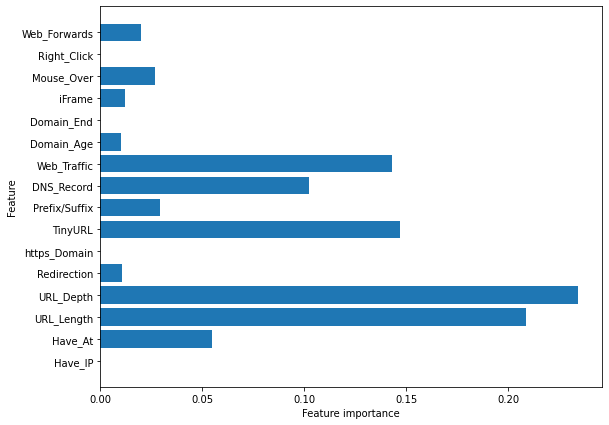

In [85]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [86]:
#storing the results.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [87]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [88]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [89]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 1.000
Multilayer Perceptrons: Accuracy on test Data: 0.500


In [90]:
#storing the results.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [91]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [92]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [93]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.625
XGBoost : Accuracy on test Data: 0.000


In [94]:
#storing the results. 
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [95]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000,1.0
1,Random Forest,1.000,0.5
2,Multilayer Perceptrons,1.000,0.5
3,XGBoost,0.625,0.0


In [96]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000,1.0
1,Random Forest,1.000,0.5
2,Multilayer Perceptrons,1.000,0.5
3,XGBoost,0.625,0.0


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [97]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [98]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)